<style>
body {
    background: #0F0F0F;
    display: flex;
    align-items: center;
    justify-content: space-between;
    min-height: 100vh;
    font-family: 'Fira Code', monospace;
    font-size: 36px;
    color: rgba(0,150,0,0.75);
    text-shadow: 0 0 5px rgba(0,150,0,0.5), 0 0 15px rgba(0,200,0,1);
    animation: Pulse 1.5s ease infinite;
}

@keyframes Pulse {
    0% { opacity: 0 }
    50% { opacity: 1 }
    100% { opacity: 0 }
}
</style>

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="text-align: left;">
        <p style="color: rgba(0,150,0,0.75); font-family: 'Fira Code', monospace; font-size: 40px; text-shadow: 0 0 5px rgba(0,150,0,0.5), 0 0 50px rgba(0,200,0,1);">Seattle Airbnb Open Data Analysis</p>
    </div>
    <div style="text-align: right; margin-left: 450px;">
        <img src="https://media.licdn.com/dms/image/D4D0BAQGJFlP6_QGxcg/company-logo_200_200/0/1693121104957?e=2147483647&v=beta&t=X9L4xkfYe_LsgUKpIh8LGzQqlyCF_Q0blASn5nDEeyQ" alt="Airbnb Logo" width="200" height="200">
    </div>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div>
    <div style="float: left;">
        <h2><font color='289C4E'>Table of contents</font></h2>
        <a class='anchor' id='top'></a>
        <ul>
            <li><a href="#1">Calendar Data</a></li>
            <li><a href="#2">Listings Data</a></li>
            <li><a href="#3">EDA</a></li>
            <li><a href="#4">Price Analysis</a></li>
            <li><a href="#5">Conclusion</a></li>
        </ul>
    </div>
    <div style="float: right; margin-left: 20px;">
        <img src="https://www.logo.wine/a/logo/Airbnb/Airbnb-Logo.wine.svg" alt="Airbnb 4ogo" width="300" height="200">
    </div>
</div>
</div>
</div>


In [3]:
cal = pd.read_csv('calendar.csv')
li = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

In [4]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
li.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [6]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
rev.listing_id.nunique()

3191

In [8]:
rev.shape

(84849, 6)

# **Calendar Data Preprocessing**

In [9]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [10]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [11]:
cal.dropna(inplace=True)
cal['price'] = cal['price'].str.replace('[$,]', '', regex=True).astype(float)
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [12]:
cal.date = pd.to_datetime(cal.date)
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [13]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [14]:
cal.available.unique()

array(['t'], dtype=object)

In [15]:
cal.drop(columns = ['available'], axis = 1, inplace = True)
cal.head(3)

,listing_id,date,price
0,241032,2016-01-04,85.0
1,241032,2016-01-05,85.0
9,241032,2016-01-13,85.0


In [16]:
cal['month'] = cal.date.dt.month
cal['year'] = cal.date.dt.year
cal.head(3)

,listing_id,date,price,month,year
0,241032,2016-01-04,85.0,1,2016
1,241032,2016-01-05,85.0,1,2016
9,241032,2016-01-13,85.0,1,2016


In [17]:
avg_price_per_month = cal.groupby('month')['price'].mean().to_frame()
avg_price_per_month['month'] = avg_price_per_month.index
avg_price_per_month.index = np.arange(avg_price_per_month.shape[0])
avg_price_per_month

,price,month
0,122.912176,1
1,124.293927,2
2,128.644488,3
3,135.097005,4
4,139.538183,5
5,147.473137,6
6,152.094150,7
7,150.656594,8
8,143.255949,9
9,137.031939,10


# **Calendar EDA**

## Average Price per month

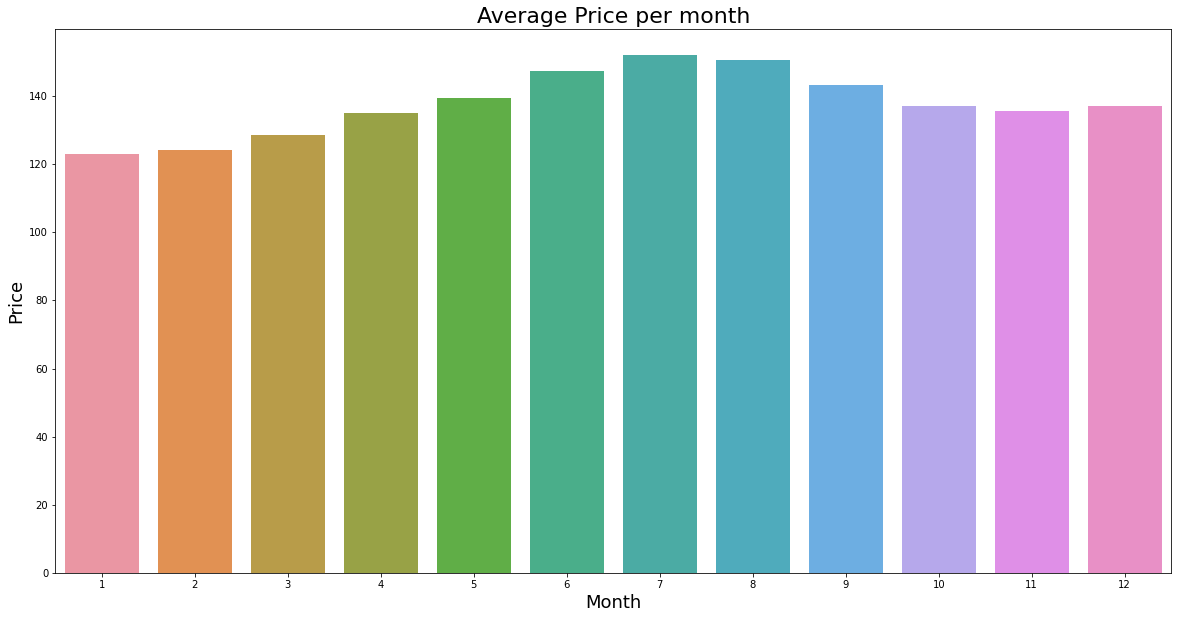

In [18]:
plt.figure(figsize = (20, 10))
sns.barplot(x = avg_price_per_month['month'], y = avg_price_per_month.price);
plt.title('Average Price per month', fontsize = 22)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

In [19]:
freq_per_month = cal.groupby('month')['price'].count().to_frame()
freq_per_month['month'] = freq_per_month.index
freq_per_month.index = np.arange(freq_per_month.shape[0])
freq_per_month

,price,month
0,64937,1
1,73321,2
2,83938,3
3,76037,4
4,79971,5
5,77244,6
6,74222,7
7,76347,8
8,77246,9
9,82438,10


## Number of reservations per month

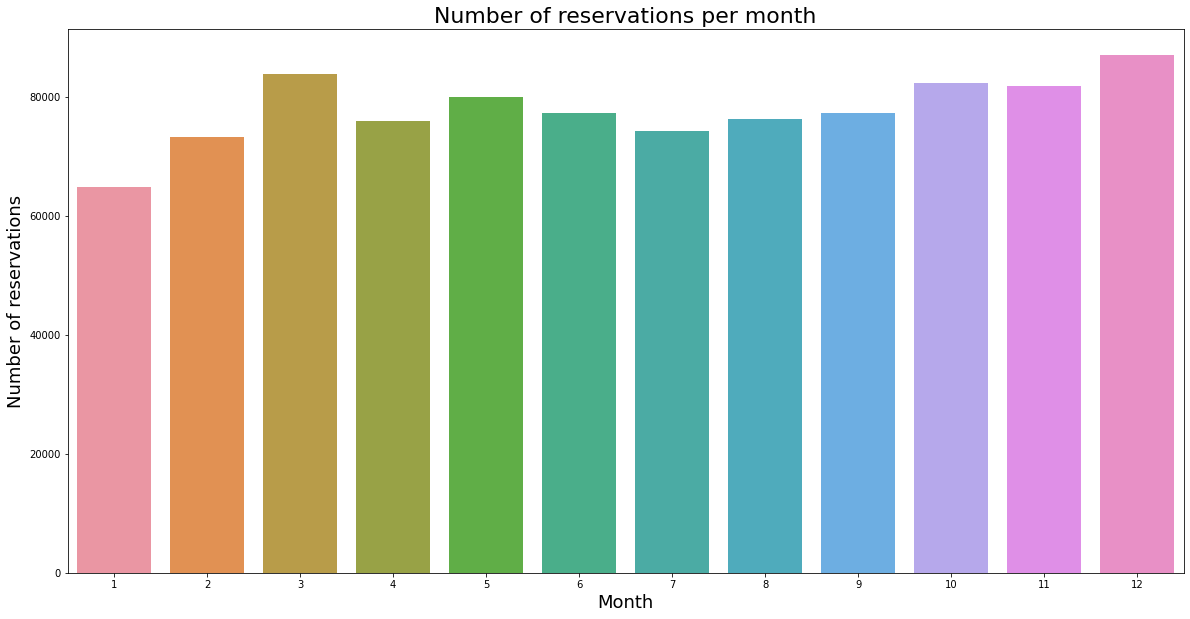

In [20]:
plt.figure(figsize = (20, 10))
sns.barplot(x = freq_per_month['month'], y = freq_per_month.price);
plt.title('Number of reservations per month', fontsize = 22)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Number of reservations', fontsize = 18)
plt.show()

# **Listings Data preprocessing**

In [21]:
li.shape

(3818, 92)

In [22]:
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [23]:
listings_missing_avg = li.isnull().mean().to_frame() # define dataframe contain missing values average in each column

In [24]:
listings_missing_avg.columns = ['null_avg']
listings_missing_avg['column'] = listings_missing_avg.index
listings_missing_avg.index = np.arange(listings_missing_avg.shape[0])
listings_missing_avg.head()

,null_avg,column
0,0.0,id
1,0.0,listing_url
2,0.0,scrape_id
3,0.0,last_scraped
4,0.0,name


In [25]:
listings_missing_avg.describe()

,null_avg
count,92.000000
mean,0.084893
std,0.181492
min,0.000000
25%,0.000000
50%,0.000000
75%,0.136983
max,1.000000


## Features with null values

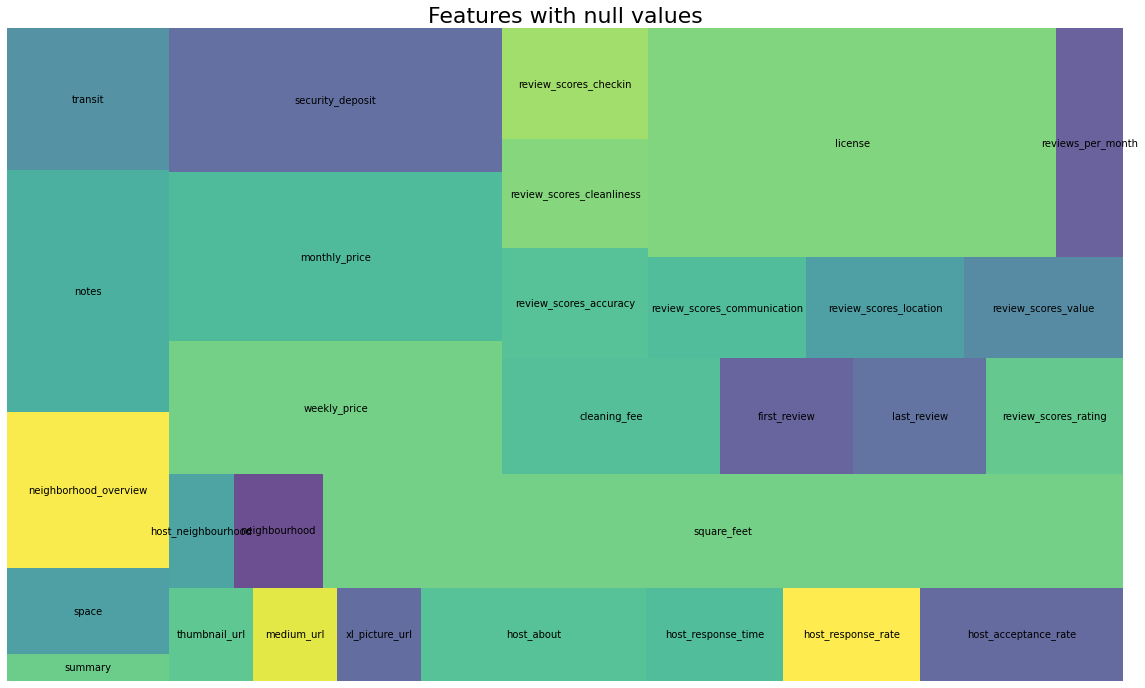

In [26]:
features_with_null = listings_missing_avg[listings_missing_avg['null_avg'] > 0.01]
plt.figure(figsize = (20, 12 ))
sizes = features_with_null['null_avg']
labels = features_with_null['column']

squarify.plot(sizes=sizes, label=labels, alpha=0.8)

plt.axis('off')
plt.title('Features with null values', fontsize = 22)


plt.show()

In [27]:
li[list(listings_missing_avg[listings_missing_avg['null_avg'] > 0.13]['column'])].head(3)

,space,neighborhood_overview,notes,transit,host_about,host_response_time,host_response_rate,host_acceptance_rate,square_feet,weekly_price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,Make your self at home in this charming one-be...,NaN,NaN,NaN,"I am an artist, interior designer, and run a s...",within a few hours,96%,100%,NaN,NaN,...,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,"Beautiful, hypoallergenic apartment in an extr...","Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,NaN,"$1,000.00",...,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,"Our house is modern, light and fresh with a wa...",Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,NaN,NaN,...,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15


In [28]:
li.drop(
columns=[
    'space',
    'neighborhood_overview',
    'notes',
    'transit',
    'host_about',
    'square_feet',
    'license'
],axis = 1, inplace=True
)

In [29]:
li.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [30]:
li.host_response_time = li.host_response_time.map({'within an hour':0,
                                                   'within a few hours':1,
                                                   'within a day':2,
                                                   'a few days or more':3}
                                                 )
li[['host_response_time']].head(3)

,host_response_time
0,1.0
1,0.0
2,1.0


In [31]:
li.host_response_time.fillna(4,inplace=True)
li.host_response_time.unique()

array([1., 0., 4., 2., 3.])

In [32]:
li.host_response_time = li.host_response_time.astype(int)

In [33]:
li[['last_review','weekly_price','host_acceptance_rate','host_response_rate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_review           3191 non-null   object
 1   weekly_price          2009 non-null   object
 2   host_acceptance_rate  3045 non-null   object
 3   host_response_rate    3295 non-null   object
dtypes: object(4)
memory usage: 119.4+ KB


In [34]:
# convert percentage columns to numerical values 

In [35]:
li.host_acceptance_rate = li.host_acceptance_rate.astype(str)
li.host_acceptance_rate = li.host_acceptance_rate.apply(lambda x:x.replace('%', ''))
li.host_acceptance_rate = li.host_acceptance_rate.astype(float)
li.host_acceptance_rate = li.host_acceptance_rate / 100 
li.host_acceptance_rate.head()

0    1.0
1    1.0
2    1.0
3    NaN
4    NaN
Name: host_acceptance_rate, dtype: float64

In [36]:
li.host_response_rate = li.host_response_rate.astype(str)
li.host_response_rate = li.host_response_rate.apply(lambda x:x.replace('%', ''))
li.host_response_rate = li.host_response_rate.astype(float)
li.host_response_rate = li.host_response_rate / 100 
li.host_response_rate.head()

0    0.96
1    0.98
2    0.67
3     NaN
4    1.00
Name: host_response_rate, dtype: float64

In [37]:
# Columns that contain information about prices Data cleaning

In [38]:
li[['cleaning_fee','security_deposit','monthly_price','weekly_price','price']].head()

,cleaning_fee,security_deposit,monthly_price,weekly_price,price
0,NaN,NaN,NaN,NaN,$85.00
1,$40.00,$100.00,"$3,000.00","$1,000.00",$150.00
2,$300.00,"$1,000.00",NaN,NaN,$975.00
3,NaN,NaN,"$2,300.00",$650.00,$100.00
4,$125.00,$700.00,NaN,NaN,$450.00


In [39]:
prices_columns = ['cleaning_fee','security_deposit','monthly_price','weekly_price','price','extra_people']
for column in prices_columns:
    li[column] = li[column].str.replace('[,$]','', regex=True).astype(float)
    li[column].fillna(0.0, inplace = True)

In [40]:
li[prices_columns].head()

,cleaning_fee,security_deposit,monthly_price,weekly_price,price,extra_people
0,0.0,0.0,0.0,0.0,85.0,5.0
1,40.0,100.0,3000.0,1000.0,150.0,0.0
2,300.0,1000.0,0.0,0.0,975.0,25.0
3,0.0,0.0,2300.0,650.0,100.0,0.0
4,125.0,700.0,0.0,0.0,450.0,15.0


In [41]:
# cleaning datetime columns

In [42]:
date_columns = ['last_scraped', 'host_since','calendar_last_scraped','first_review','last_review']
for column in date_columns:
    li[column] = pd.to_datetime(li[column])
li[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   last_scraped           3818 non-null   datetime64[ns]
 1   host_since             3816 non-null   datetime64[ns]
 2   calendar_last_scraped  3818 non-null   datetime64[ns]
 3   first_review           3191 non-null   datetime64[ns]
 4   last_review            3191 non-null   datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 149.3 KB


In [43]:
current_columns = li.columns
columns_with_na_values = []
for col in list(listings_missing_avg[(listings_missing_avg['null_avg'] > 0.0) & (listings_missing_avg['null_avg'] < 0.13)]['column']):
    if col in current_columns:
        columns_with_na_values.append(col)
columns_with_na_values

['summary',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds']

In [44]:
# delete useless columns

In [45]:
useless_columns = ['summary',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_thumbnail_url',
 'host_picture_url'
]
li.drop(columns=useless_columns, axis = 1, inplace = True)
li.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,none,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48


In [46]:
# encode true & flase (boolean) columns

In [47]:
tf_columns = []
for column in li.columns:
    if li[column][0] in ['t','f']:
        tf_columns.append(column)
tf_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [48]:
for column in tf_columns:
    li[column] = li[column].map({'t':1, 'f':0})
li[tf_columns].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0.0,1.0,1.0,1,1,0,0,0,0
1,1.0,1.0,1.0,1,1,0,0,1,1
2,0.0,1.0,1.0,1,1,0,0,0,0
3,0.0,1.0,1.0,1,1,0,0,0,0
4,0.0,1.0,1.0,1,1,0,0,0,0


In [49]:
li[tf_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_is_superhost                 3816 non-null   float64
 1   host_has_profile_pic              3816 non-null   float64
 2   host_identity_verified            3816 non-null   float64
 3   is_location_exact                 3818 non-null   int64  
 4   has_availability                  3818 non-null   int64  
 5   requires_license                  3818 non-null   int64  
 6   instant_bookable                  3818 non-null   int64  
 7   require_guest_profile_picture     3818 non-null   int64  
 8   require_guest_phone_verification  3818 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 268.6 KB


In [50]:
# split amenities , convert each amenity to a 0,1 feature (bool)

In [51]:
li.amenities.unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [52]:
amenities =  list(li.amenities.unique())
unique_amenities = set()
for amenity in amenities:
    for item in amenity.split(','):
        unique_amenities.add(item.replace('{','').replace('"','').replace('}',''))
unique_amenities

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [53]:
unique_amenities = list(unique_amenities)

In [54]:
for amenity in unique_amenities[1:]:
    li[f'available_{amenity}'] = li['amenities'].map(lambda x: 1 if amenity in x else 0)

In [55]:
corr_matrx = li.corr()
corr_matrx[['price','review_scores_rating','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_location','review_scores_value']]

,price,review_scores_rating,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_location,review_scores_value
id,-0.046289,0.039246,0.003389,-0.004710,0.068112,0.045355,0.105444,0.087858
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,-0.051332,0.027348,0.025023,0.022116,0.047576,0.026768,0.073277,0.078829
host_response_time,0.119064,-0.053659,-0.032292,-0.023093,-0.093593,-0.046719,-0.048378,-0.064540
host_response_rate,-0.014071,0.156567,0.155346,0.148516,0.170897,0.130925,0.070827,0.149482
...,...,...,...,...,...,...,...,...
available_Kitchen,0.125024,0.003243,-0.003786,-0.035952,-0.042026,-0.013290,0.018198,-0.026659
available_Dryer,0.108310,0.029412,0.003689,-0.007262,-0.007593,-0.003712,0.008016,0.011223
available_Dog(s),-0.045007,0.054812,0.031688,0.054255,0.018384,0.042789,-0.000010,0.060311
available_Hot Tub,0.127066,-0.014822,-0.023616,-0.049176,0.011394,-0.035463,0.031621,-0.026492


In [56]:
df = corr_matrx[['price','review_scores_rating','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_location','review_scores_value']]

In [57]:
high_corr_review_value = df[(df['review_scores_value'] > 0.1)]['review_scores_value'].to_frame()
high_corr_review_value

,review_scores_value
host_response_rate,0.149482
host_is_superhost,0.221285
review_scores_rating,0.696534
review_scores_accuracy,0.562878
review_scores_cleanliness,0.524354
review_scores_checkin,0.403263
review_scores_communication,0.463772
review_scores_location,0.368252
review_scores_value,1.000000
reviews_per_month,0.126014


In [58]:
# columns with above 0.23 correlation is related about reviews 
targetted_list = list(high_corr_review_value[high_corr_review_value['review_scores_value'] < 0.23].index)
targetted_list.remove('reviews_per_month')
targetted_list

['host_response_rate',
 'host_is_superhost',
 'available_Free Parking on Premises',
 'available_First Aid Kit',
 'available_Pets live on this property']

In [59]:
review_value_df = corr_matrx[targetted_list].loc['review_scores_value',:].to_frame()
review_value_df['Feature'] = review_value_df.index
review_value_df.index = np.arange(review_value_df.shape[0])
review_value_df

,review_scores_value,Feature
0,0.149482,host_response_rate
1,0.221285,host_is_superhost
2,0.104606,available_Free Parking on Premises
3,0.101641,available_First Aid Kit
4,0.105870,available_Pets live on this property


In [60]:
review_value_df = review_value_df.sort_values(by = 'review_scores_value', ascending=False)
review_value_df

,review_scores_value,Feature
1,0.221285,host_is_superhost
0,0.149482,host_response_rate
4,0.105870,available_Pets live on this property
2,0.104606,available_Free Parking on Premises
3,0.101641,available_First Aid Kit


# **Listings EDA**

## Features affect on review scores value

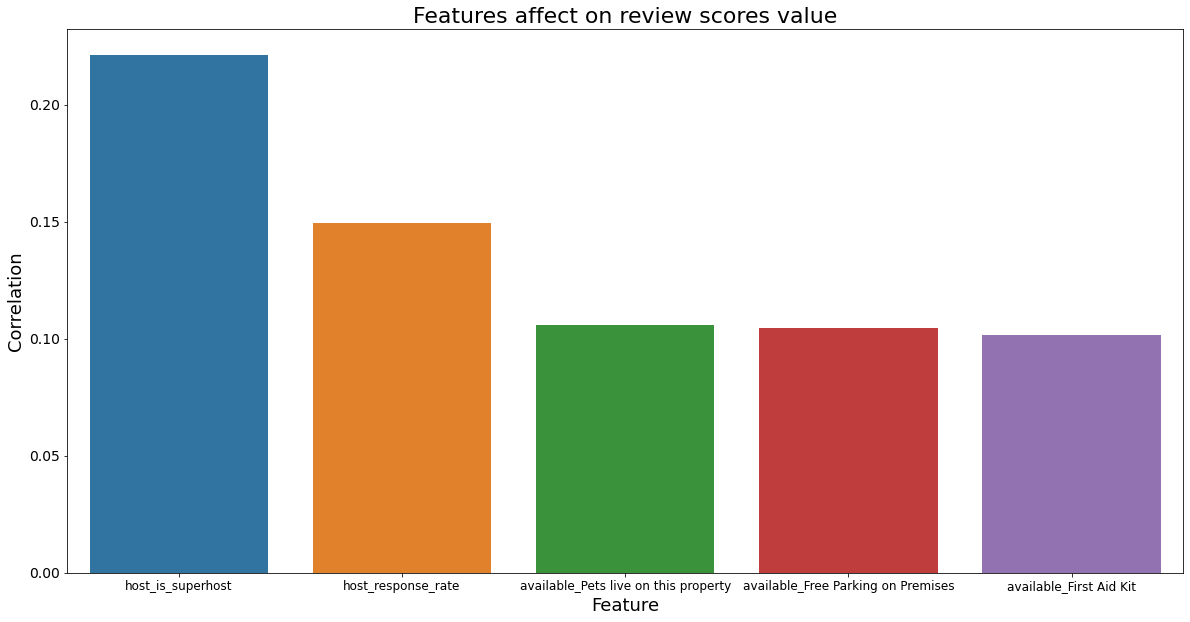

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(x = review_value_df['Feature'],
           y = review_value_df['review_scores_value']);
plt.title('Features affect on review scores value', fontsize = 22)
plt.xlabel('Feature', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.ylabel('Correlation', fontsize = 18)
plt.show()

## meaningful features affected on review scores value 
- if the host is super host 22.21%
- also host reponse rate affect with ~ 15%
- pets live , Free parking, and first aid kit ~ 10%
#### Of course, there were other features that affect the review value, but they do not indicate anything like
- review_scores_cleanliness
- review_scores_accuracy
- review_scores_rating

In [62]:
avg_price_per_room_type = li.groupby('room_type')['price'].mean().to_frame()
avg_price_per_room_type['std_price'] = li.groupby('room_type')['price'].std()
avg_price_per_room_type['room_type'] = avg_price_per_room_type.index
avg_price_per_room_type.index = np.arange(avg_price_per_room_type.shape[0])
avg_price_per_room_type

,price,std_price,room_type
0,155.843369,96.551181,Entire home/apt
1,75.044828,34.603905,Private room
2,47.547009,19.372704,Shared room


## Average price per room type

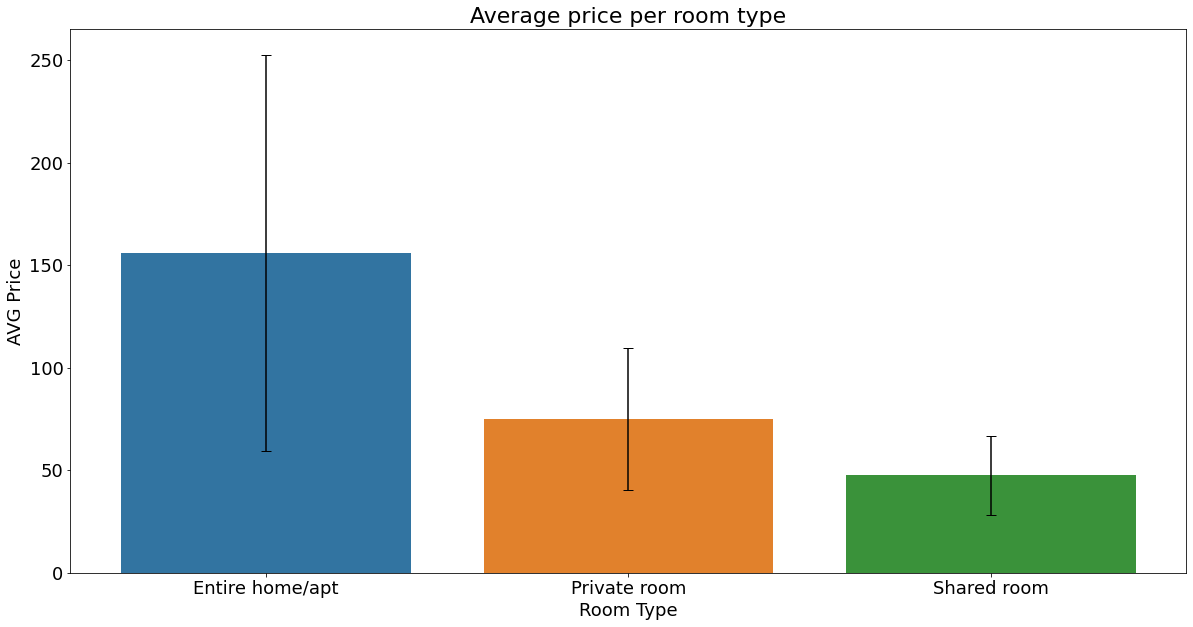

In [63]:
plt.figure(figsize=(20, 10))
sns.barplot(x = avg_price_per_room_type['room_type'],
           y = avg_price_per_room_type['price']);
plt.errorbar(x = avg_price_per_room_type['room_type'],
           y = avg_price_per_room_type['price'], yerr=avg_price_per_room_type['std_price'],
             fmt='none', color='black', capsize=5)
plt.title('Average price per room type', fontsize = 22)
plt.xlabel('Room Type', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('AVG Price', fontsize = 18)
plt.show()

In [64]:
corr_matrx[(corr_matrx['price'] > 0.2) | (corr_matrx['price'] < -0.2)]['price']

accommodates                     0.652218
bathrooms                        0.516424
bedrooms                         0.627720
beds                             0.589525
price                            1.000000
weekly_price                     0.394486
monthly_price                    0.275787
security_deposit                 0.333579
cleaning_fee                     0.576423
guests_included                  0.392875
reviews_per_month               -0.218588
available_Cable TV               0.237309
available_Family/Kid Friendly    0.259901
available_TV                     0.222488
Name: price, dtype: float64

In [65]:
li.neighbourhood_group_cleansed.unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [66]:
li.review_scores_rating.describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

## property type percentage

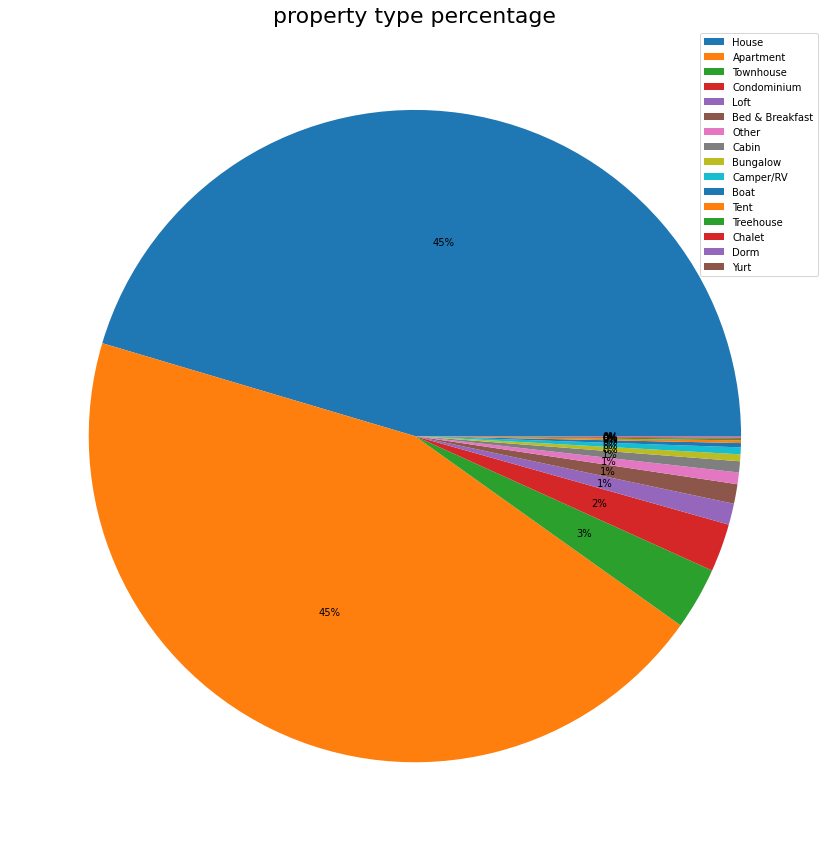

In [67]:
plt.figure(figsize=(15, 15))
property_type_df = li.groupby('property_type')['id'].count().to_frame()
property_type_df.sort_values(by = 'id',ascending=False,inplace=True)
plt.pie(property_type_df['id'],autopct='%.0f%%')
plt.legend(labels = list(property_type_df.index),loc='best')
plt.title('property type percentage', fontsize = 22)
plt.show()

In [68]:
li[date_columns].head(3)

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
0,2016-01-04,2011-08-11,2016-01-04,2011-11-01,2016-01-02
1,2016-01-04,2013-02-21,2016-01-04,2013-08-19,2015-12-29
2,2016-01-04,2014-06-12,2016-01-04,2014-07-30,2015-09-03


In [69]:
corr_matrx[(corr_matrx['price'] > 0.2 ) | (corr_matrx['price'] < -0.2 )]['price']

accommodates                     0.652218
bathrooms                        0.516424
bedrooms                         0.627720
beds                             0.589525
price                            1.000000
weekly_price                     0.394486
monthly_price                    0.275787
security_deposit                 0.333579
cleaning_fee                     0.576423
guests_included                  0.392875
reviews_per_month               -0.218588
available_Cable TV               0.237309
available_Family/Kid Friendly    0.259901
available_TV                     0.222488
Name: price, dtype: float64

## price distribution

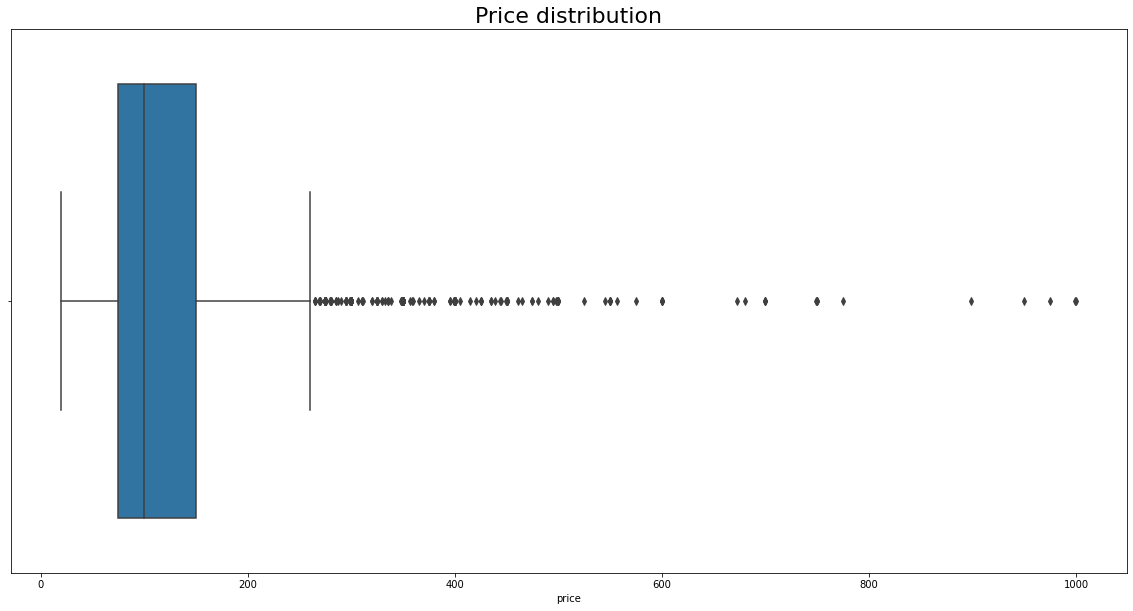

In [70]:
plt.figure(figsize = (20,10))
sns.boxplot(x = li.price)
plt.title('Price distribution', fontsize = 22)
plt.show()

## Price per bedrooms number

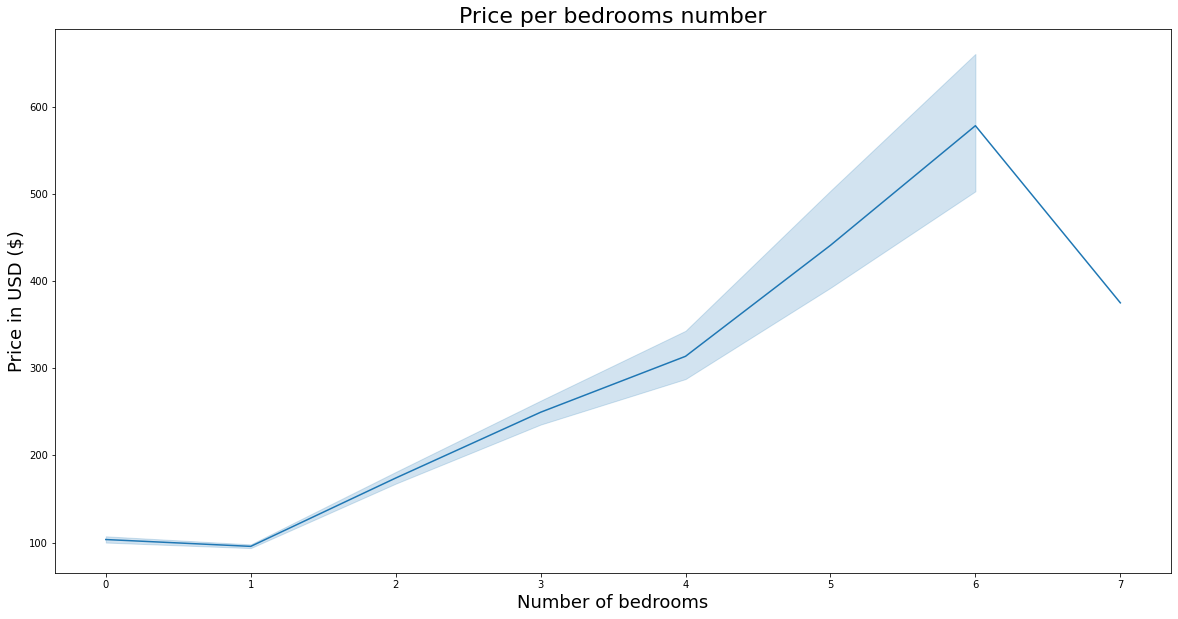

In [71]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = li.bedrooms, y = li.price)
plt.title('Price per bedrooms number', fontsize = 22)
plt.xlabel('Number of bedrooms', fontsize = 18)
plt.ylabel('Price in USD ($)', fontsize = 18)
plt.show()

# **Conclusion**

<div style="font-family: 'Courier New', monospace;">

<ul style="list-style-type: none; padding-left: 0;">
    <li style="list-style-type: none;">&#9654; <b>## Calendar:</b></li>
</ul>

- During the summer months of June, July, and August, there is a noticeable increase in average prices, likely due to higher demand from tourists and vacationers.
- The number of reservations shows significant spikes in December and March, indicating potential peak travel seasons or holiday periods.

<ul style="list-style-type: none; padding-left: 0;">
    <li style="list-style-type: none;">&#9654; <b>## Listings:</b></li>
</ul>

- Becoming a super host and maintaining a high response rate positively influence review scores, while certain amenities such as allowing pets, providing free parking, and offering a first aid kit contribute positively, albeit to a lesser extent.
- On average, the price of an entire home is approximately 200% of the price of a private room and 300% of the price of a shared room, suggesting higher demand for entire accommodations.
- The vast majority (90%) of reservations are for houses or apartments, highlighting a preference for these types of accommodations among guests.
- Reservation prices typically range from $20 to $262.5 USD, with many outliers exceeding $1000 USD, indicating a wide range of pricing options in the market.
- The number of bedrooms in a listing strongly influences reservation prices, accounting for approximately 62.77% of the variance in pricing.

<ul style="list-style-type: none; padding-left: 0;">
    <li style="list-style-type: none;">&#9654; <b>## Reviews:</b></li>
</ul>

- The dataset does not contain numerical columns for reviews, limiting the ability to perform quantitative analysis. However, natural language processing techniques could be applied to classify and analyze the content of reviews, providing insights into guest satisfaction, common issues, and areas for improvement.

</div>
.

</div>
nt.

</div>
 improvement.